## สร้าง AI Agent ด้วย Google ADK

### สิ่งที่คุณจะได้เรียนรู้จาก Tutorial นี้

1. **ADK ของ Google คืออะไร** – ทำความเข้าใจแนวคิดพื้นฐาน
2. **จุดเด่นของ ADK** – ทำไมถึงควรใช้
3. **การติดตั้งและตั้งค่า** – เตรียมสภาพแวดล้อมของคุณ
4. **องค์ประกอบหลัก** – สถาปัตยกรรมของ ADK
5. **Agent แรกของคุณ** – สร้าง Agent ที่สามารถทำงานได้จริง
6. **สร้าง Agent ที่สามารถนำไปใช้งานได้** – สร้าง Weather Agent แบบ deploy ได้

---



**ความรู้พื้นฐานที่ควรมีมาก่อน:**
- พื้นฐานการเขียนโปรแกรมด้วย Python
- API Key จาก Google AI Studio

## ส่วนที่ 1: Agent Development Kit (ADK) คืออะไร

### คำจำกัดความ

**Agent Development Kit (ADK)** คือ framework แบบ open-source จาก Google ที่ถูกออกแบบมาเพื่อช่วยให้นักพัฒนาสามารถสร้าง AI Agent และระบบ Multi-agent ที่มีความชาญฉลาดได้ง่ายขึ้น

### คุณลักษณะเด่น:

- **Multi-agent โดยการออกแบบ**: สร้างระบบที่ Agent หลายตัวสามารถทำงานร่วมกัน
- **ยืดหยุ่นและมีความเป็นโมดูล**: รองรับการใช้โมเดล AI ได้หลากหลาย (เช่น Gemini, Claude, GPT เป็นต้น)
- **เครื่องมือในตัว (Tools)**: เช่น ระบบค้นหา การรันโค้ด และอื่น ๆ
- **พร้อมใช้งานใน production**: Google ใช้ ADK ภายในองค์กรจริง
- **ระบบ orchestrate ขั้นสูง**: ควบคุม flow การทำงานได้อย่างแม่นยำ

### ทำไม ADK ถึงสำคัญ?

ADK สะท้อนการเปลี่ยนแปลงของแนวทางการพัฒนา AI — จากการใช้โมเดลเดียวแก้ปัญหาทุกอย่าง ไปสู่การสร้าง **ระบบที่ประกอบด้วย Agent เฉพาะทาง** ที่ทำงานร่วมกันเพื่อแก้ไขปัญหาที่ซับซ้อน


## ส่วนที่ 2: จุดเด่นของ ADK

### 1. Multi-agent โดยการออกแบบ  
- สร้างระบบที่ประกอบด้วย Agent เฉพาะทางที่สามารถทำงานร่วมกัน  
- รองรับการ orchestrate ทั้งแบบขนาน แบบลำดับ และแบบลำดับชั้น  
- ออกแบบมาให้มีความเป็นโมดูลและสามารถขยายระบบได้ง่าย

### 2. ความยืดหยุ่นของโมเดล  
- รองรับโมเดลต่าง ๆ เช่น Gemini, Claude, GPT, Llama และอื่น ๆ  
- สามารถเชื่อมต่อกับ LiteLLM เพื่อรองรับโมเดลได้หลากหลาย  
- เปลี่ยนโมเดลได้โดยไม่ต้องแก้โครงสร้างระบบหลัก

### 3. ระบบนิเวศของเครื่องมือ  
- มีเครื่องมือสำเร็จรูปให้ใช้งาน เช่น search, code และอื่น ๆ  
- สามารถสร้างฟังก์ชันแบบกำหนดเองได้ง่าย  
- รองรับการเชื่อมต่อกับ LangChain และ LlamaIndex

### 4. การ orchestrate ที่ยืดหยุ่น  
- รองรับการสร้าง workflow Agent  
- สามารถกำหนด routing แบบ dynamic ด้วย LLM  
- ควบคุมพฤติกรรมของ Agent ได้อย่างแม่นยำ

### 5. ประสบการณ์ด้านการพัฒนา  
- มีทั้ง CLI และ Web UI ให้ใช้งาน  
- รองรับการ debug แบบแสดงผลภาพ  
- มีระบบ evaluation ในตัว  
- สามารถ deploy ได้ง่ายและรวดเร็ว

## ⚙️ Parte 3: Instalación y Configuración

### Paso 1: Instalar el ADK de Google

In [2]:
## การติดตั้ง Google ADK

print("📦 Install Google ADK...")  # ติดตั้ง Google ADK
!pip install -qU google-adk==1.4.2

# ติดตั้งไลบรารีเสริมเพิ่มเติมที่จำเป็น
!pip install -qU python-dotenv

print("\n✅ Complete installation!")  # แสดงข้อความเมื่อการติดตั้งเสร็จสมบูรณ์

# ตรวจสอบเวอร์ชันที่ติดตั้งของ google-adk
!pip show google-adk | grep -E "Name:|Version:"

📦 Instalando Google ADK...

✅ Complete installation!
Name: google-adk
Version: 1.4.2


_____

### Paso 2: Configurar las Credenciales

Para usar modelos de Google (como Gemini), necesitas una API Key.

#### 🔑 Obtener tu API Key:
1. Ve a [Google AI Studio](https://aistudio.google.com/apikey)
2. Crea o selecciona un proyecto
3. Genera una nueva API Key
4. Cópiala y pégala en la celda siguiente

#### Opcion 1: Ingresa el api de manera manual

In [29]:
# Configurar credenciales de forma segura
import os
from getpass import getpass

# Solicitar API Key de forma segura
if 'GOOGLE_API_KEY' not in os.environ:
    print("🔑 Por favor, ingresa tu Google API Key:")
    api_key = getpass("API Key: ")
    os.environ['GOOGLE_API_KEY'] = api_key
    os.environ['GOOGLE_GENAI_USE_VERTEXAI'] = 'FALSE'
    print("\n✅ API Key configurada correctamente")
else:
    print("✅ API Key ya configurada")

# Verificar que las variables estén configuradas
print(f"\n📋 Variables de entorno configuradas:")
print(f"   - GOOGLE_API_KEY: {'✓' if os.environ.get('GOOGLE_API_KEY') else '✗'}")
print(f"   - GOOGLE_GENAI_USE_VERTEXAI: {os.environ.get('GOOGLE_GENAI_USE_VERTEXAI', 'No configurado')}")

✅ API Key ya configurada

📋 Variables de entorno configuradas:
   - GOOGLE_API_KEY: ✗
   - GOOGLE_GENAI_USE_VERTEXAI: FALSE


#### Opcion 2 - Dotenv

In [30]:
from dotenv import load_dotenv
# Cargar variables de entorno desde .env si existe
load_dotenv(override=True)

True

_____

## 🏗️ Parte 4: องค์ประกอบหลัก ของ AI Agent

```
┌─────────────────────────────────────────────┐
│              Google ADK                     │
├─────────────────────────────────────────────┤
│                                             │
│  ┌─────────┐  ┌─────────┐  ┌─────────┐      │
│  │ Agentes │  │  Tools  │  │Sessions │      │
│  └────┬────┘  └────┬────┘  └────┬────┘      │
│       │            │            │           │
│  ┌────┴────────────┴────────────┴─────┐     │
│  │              Runners               │     │
│  └────────────────────────────────────┘     │
│                                             │
└─────────────────────────────────────────────┘
```
## องค์ประกอบหลัก:

### 🤖 ตัวแทน (Agents)
- **LlmAgent**: ตัวแทนที่ขับเคลื่อนด้วย LLM
- **WorkflowAgent**: ตัวจัดระเบียบการทำงานของตัวแทนอื่น ๆ
- **ประเภทที่เชี่ยวชาญ**:
  - Sequential: ทำงานตามลำดับ
  - Parallel: ทำงานพร้อมกัน
  - Loop: ทำงานในลูป

### 🔧 เครื่องมือ (Tools)
- ฟังก์ชันที่ตัวแทนสามารถใช้
- **ที่เตรียมไว้ล่วงหน้า**: การค้นหา, โค้ด ฯลฯ
- **ปรับแต่งได้ตามความต้องการ**

### ▶️ ตัวดำเนินการ (Runners)
- จัดการกระบวนการการทำงาน
- จัดการข้อความและเหตุการณ์
- ควบคุมสถานะ

### 💾 เซสชัน (Sessions)
- รักษาบริบทระหว่างการโต้ตอบ
- เก็บข้อมูลสำคัญ
- สนับสนุนการสนทนาที่ต่อเนื่อง


_____

## 🎈 ส่วนที่ 5: เอเจนต์แรกของคุณกับ ADK!

### การสร้างเอเจนต์ที่ง่าย

ในส่วนนี้ เราจะสร้างเอเจนต์ตัวแรกของเรา: ผู้ช่วยที่สามารถค้นหาข้อมูลจาก **Google** ได้

#### ขั้นตอนในการสร้างเอเจนต์:
1. **ตั้งค่าสภาพแวดล้อม**:
   - ตรวจสอบให้แน่ใจว่าคุณติดตั้ง **ADK** (Agent Development Kit) และมีข้อมูลประจำตัวจาก Google เพื่อเข้าถึง API การค้นหาของ Google

2. **กำหนดวัตถุประสงค์ของเอเจนต์**:
   - เอเจนต์จะค้นหาคำตอบที่เกี่ยวข้องกับคำถามทั่วไปหรือคำค้นหาที่ระบุโดยใช้การค้นหาของ Google

3. **พัฒนาโค้ดพื้นฐาน**:
   - เราจะใช้ Python และไลบรารีของ Google เพื่อพัฒนาเอเจนต์

In [32]:
from google.adk.agents import Agent
from google.adk.runners import Runner
from google.adk.sessions import InMemorySessionService
from google.adk.tools import google_search
from google.genai import types

In [1]:
agent_search = Agent(
    name="SimpleSearchAgent",  # Name of the agent
    model="gemini-2.5-flash",  # Fast and efficient model
    description="A friendly agent that can search for updated information on Google.",  # Agent description
    tools=[google_search],  # Search tool
    instruction=(
        "You are a friendly and helpful assistant."  # You are a friendly and helpful assistant
        "When asked a question, use the Google search tool if necessary."  # Use the Google search tool when required
        "Provide concise and clear answers."  # Provide concise and clear answers
        "If you're unsure, search for updated information."  # If you're unsure, search for updated info
        "Always be polite and professional."  # Always be polite and professional
    )
)

NameError: name 'Agent' is not defined

In [ ]:
# แนวคิดหลัก: SessionService จะเก็บประวัติและสถานะของการสนทนา
# InMemorySessionService เป็นการเก็บข้อมูลแบบง่ายที่ไม่ถาวร สำหรับการทดสอบในบทเรียนนี้
session_service = InMemorySessionService()

# กำหนดค่าคงที่เพื่อระบุบริบทของการโต้ตอบ
APP_NAME = "my_first_agent"  # ชื่อแอปพลิเคชัน
USER_ID = "user_1"  # รหัสผู้ใช้ที่ไม่ซ้ำกัน
SESSION_ID = "session_001"  # ใช้ ID คงที่สำหรับการทดลอง

# สร้างเซสชันที่เฉพาะเจาะจงที่การสนทนาจะเกิดขึ้น
session = await session_service.create_session(
    app_name=APP_NAME,  # ชื่อแอปที่เริ่มการสนทนา
    user_id=USER_ID,  # รหัสของผู้ใช้ที่เริ่มการสนทนา
    session_id=SESSION_ID  # รหัสของเซสชัน ซึ่งสามารถเป็นเอกลักษณ์สำหรับแต่ละการสนทนา
)

# แสดงข้อความที่แสดงว่าเซสชันถูกสร้างแล้ว
print(f"เซสชันถูกสร้างแล้ว: แอป='{APP_NAME}', ผู้ใช้='{USER_ID}', เซสชัน='{SESSION_ID}'")


Sesión creada: App='mi_primer_agente', Usuario='user_1', Sesión='session_001'


In [ ]:
# Runner: This is the main component that manages the interaction with the agent.
runner = Runner(agent=agent_search,  # The agent that will handle the requests
                app_name=APP_NAME,  # The application name
                session_service=session_service)  # The session service to manage session state

# Print a message confirming the creation of the runner for the specific agent
print(f"Runner created for the agent '{runner.agent.name}'.")


Runner creado para el agente 'AgenteBuscadorSimple'.


In [ ]:
# Example: Sending messages to the agent
events = runner.run(user_id=USER_ID,  # Sending user ID
          session_id=SESSION_ID,  # Sending session ID
          new_message=types.Content(role='user', parts=[types.Part(text="Quien eres?")]))  # User's message: "Who are you?"

# Iterate through the events generated by the agent
for event in events:
    if event.is_final_response():  # Check if the event contains the final response
        if event.grounding_metadata.grounding_chunks:  # Check if grounding is needed
            for _ in event.grounding_metadata.grounding_chunks:
                print(f"Grounding Chunk: {_.web.title}")  # Print grounding chunk (e.g., related web info)
        else:
            print("No need for grounding.")  # No grounding needed

        # Extract and print the final response from the agent
        final_response = event.content.parts[0].text
        print("Agent Response: ", final_response)


No es necesario el uso de grounding.
Agent Response:  Soy un modelo de lenguaje grande, entrenado por Google.


In [ ]:
# Example: Sending messages to the agent
events = runner.run(user_id=USER_ID,  # Send user ID
          session_id=SESSION_ID,  # Send session ID
          new_message=types.Content(role='user', parts=[types.Part(text="¿Cuáles son las últimas noticias sobre IA?")]))  # User message: "What are the latest news on AI?"

# Iterate through the events generated by the agent
for event in events:
    if event.is_final_response():  # Check if the event contains the final response
        if event.grounding_metadata.grounding_chunks:  # Check if grounding is needed (external data)
            for _ in event.grounding_metadata.grounding_chunks:
                print(f"Grounding Chunk: {_.web.title}")  # Print the title of the grounding chunk (e.g., web info)
        else:
            print("No need for grounding.")  # If no grounding is needed, print this message

        # Extract and print the final response from the agent
        final_response = event.content.parts[0].text
        print("Agent Response: ", final_response)

Grounding Chunk: xataka.com
Grounding Chunk: fundacionbankinter.org
Grounding Chunk: infobae.com
Grounding Chunk: securities.io
Grounding Chunk: lanacion.com.ar
Grounding Chunk: elcomercio.pe
Grounding Chunk: tn.com.ar
Grounding Chunk: aecoc.es
Grounding Chunk: exame.com
Grounding Chunk: imascono.com
Grounding Chunk: ina-pidte.ac.cr
Agent Response:  Las últimas noticias sobre inteligencia artificial (IA) muestran un rápido avance y una creciente integración en diversos aspectos de la vida cotidiana y los negocios.

Algunos de los desarrollos más recientes y las tendencias destacadas incluyen:

*   **IA en la vida cotidiana y los negocios:** La IA ya organiza las colas en parques de atracciones como Disney y Legoland para mejorar la eficiencia y la experiencia del cliente. Empresas como Amazon esperan que la IA reduzca su plantilla total en los próximos años, redefiniendo roles y demandas de habilidades en el mercado laboral.
*   **Avances en chips y hardware:** Apple está utilizando IA

### การสื่อสารกับเอเจนต์โดยใช้ `async`

เราจำเป็นต้องมีวิธีการส่งข้อความไปยังเอเจนต์ของเราและรับคำตอบจากมัน เนื่องจากการเรียกใช้โมเดลภาษา (LLMs) และการดำเนินการเครื่องมืออาจใช้เวลานาน `Runner` ของ ADK จึงทำงานแบบอะซิงโครนัส (asynchronous)

เราจะกำหนดฟังก์ชันช่วยเหลือแบบอะซิงโครนัส (`call_agent_async`) ซึ่ง:

* รับข้อความเป็นสายอักขระจากการสอบถามของผู้ใช้
* บรรจุข้อความนั้นในรูปแบบ `Content` ของ ADK
* เรียก `runner.run_async` โดยให้บริบทของผู้ใช้/เซสชันและข้อความใหม่
* ทำการวนลูปผ่าน `Events` ที่ถูกสร้างขึ้นโดย `runner` ซึ่งเหตุการณ์เหล่านี้แสดงถึงขั้นตอนในกระบวนการทำงานของเอเจนต์ (เช่น การขอเครื่องมือ การรับผลลัพธ์ ความคิดระหว่างขั้นตอนของ LLM หรือคำตอบสุดท้าย)
* ระบุและพิมพ์เหตุการณ์คำตอบสุดท้ายโดยใช้ `event.is_final_response()`

#### ทำไมต้องใช้ `async`?

การโต้ตอบกับ LLMs และเครื่องมือ (เช่น APIs ภายนอก) เป็นการดำเนินการที่ขึ้นอยู่กับการเข้าออกข้อมูล (I/O-bound) การใช้ `asyncio` ช่วยให้สามารถจัดการการดำเนินการเหล่านี้ได้อย่างมีประสิทธิภาพโดยไม่บล็อกการทำงานของโปรแกรม


In [38]:
async def call_agent_async(query: str, runner, user_id, session_id):
    """Envía una consulta al agente e imprime la respuesta final."""
    print(f"\n>>> Consulta del usuario: {query}")

    # Prepara el mensaje del usuario en el formato de ADK
    content = types.Content(role='user', parts=[types.Part(text=query)])

    final_response_text = "El agente no produjo una respuesta final." # Valor por defecto

    # Concepto clave: run_async ejecuta la lógica del agente y genera eventos.
    # Iteramos a través de los eventos para encontrar la respuesta final.
    async for event in runner.run_async(user_id=user_id, session_id=session_id, new_message=content):
        # Puedes descomentar la línea de abajo para ver *todos* los eventos durante la ejecución
        # print(f"  [Evento] Autor: {event.author}, Tipo: {type(event).__name__}, Final: {event.is_final_response()}, Contenido: {event.content}")

        # Concepto clave: is_final_response() marca el mensaje que concluye el turno.
        if event.is_final_response():
            if event.content and event.content.parts:
                # Se asume que la respuesta de texto está en la primera parte
                final_response_text = event.content.parts[0].text
            elif event.actions and event.actions.escalate: # Maneja posibles errores/escalamientos
                final_response_text = f"El agente escaló: {event.error_message or 'Sin mensaje específico.'}"
            # Agrega más validaciones aquí si es necesario (por ejemplo, códigos de error específicos)
            break # Deja de procesar eventos una vez encontrada la respuesta final

    print(f"<<< Respuesta del agente: {final_response_text}")


In [40]:
await call_agent_async("¿Cuáles son las últimas noticias sobre IA?...busca en internet si hace falta",
                        runner=runner,
                        user_id=USER_ID,
                        session_id=SESSION_ID)


>>> Consulta del usuario: ¿Cuáles son las últimas noticias sobre IA?...busca en internet si hace falta
<<< Respuesta del agente: La inteligencia artificial (IA) continúa su avance vertiginoso, con innovaciones y debates que marcan la pauta en diversos sectores. Aquí te presento un resumen de las últimas noticias sobre IA: 

 **1. Avances en Modelos y Capacidades:** 

 *   **IA Generativa Multimodal:** OpenAI lanzó GPT-4o, un nuevo modelo que integra y procesa texto, audio e imágenes simultáneamente, marcando un salto significativo en la capacidad multimodal de la IA. Esta IA generativa está remodelando industrias al crear contenido nuevo como texto, imágenes y música.
 *   **Mejoras en Motores de Búsqueda:** Gemini 1.5 Ultra de Google está optimizando la relevancia y precisión de los resultados de búsqueda, lo que facilita a los usuarios encontrar información de manera más rápida y eficiente.
 *   **Procesamiento del Lenguaje Natural (PLN):** Los avances recientes en PLN están mejoran

_____

## 🎈 Parte 6: ¡Antes de terminar creemos un agente que podamos desplegar!

### Crearemos el hola mundo de los agentes en formato .py

Vamos a crear nuestro primer capaz de identificar si llama a una funcion de tiempo o clima segun corresponda usando los entornos interactivos de ADK


### 🧭 Navega a la estructura del proyecto y ejecuta el comando adecuado

Asegúrate de ubicarte en el directorio correcto dentro del curso. Una vez allí, puedes ejecutar uno de los siguientes comandos según corresponda:

* Para abrir la interfaz web del agente:

  ```bash
  adk web
  ```

* Para ejecutar el agente directamente desde consola:

  ```bash
  adk run "Mi Primer Agente"
  ```

### 📂 Estructura esperada del proyecto:

```
Mi Primer Agente
├── __init__.py
└── agent.py
```

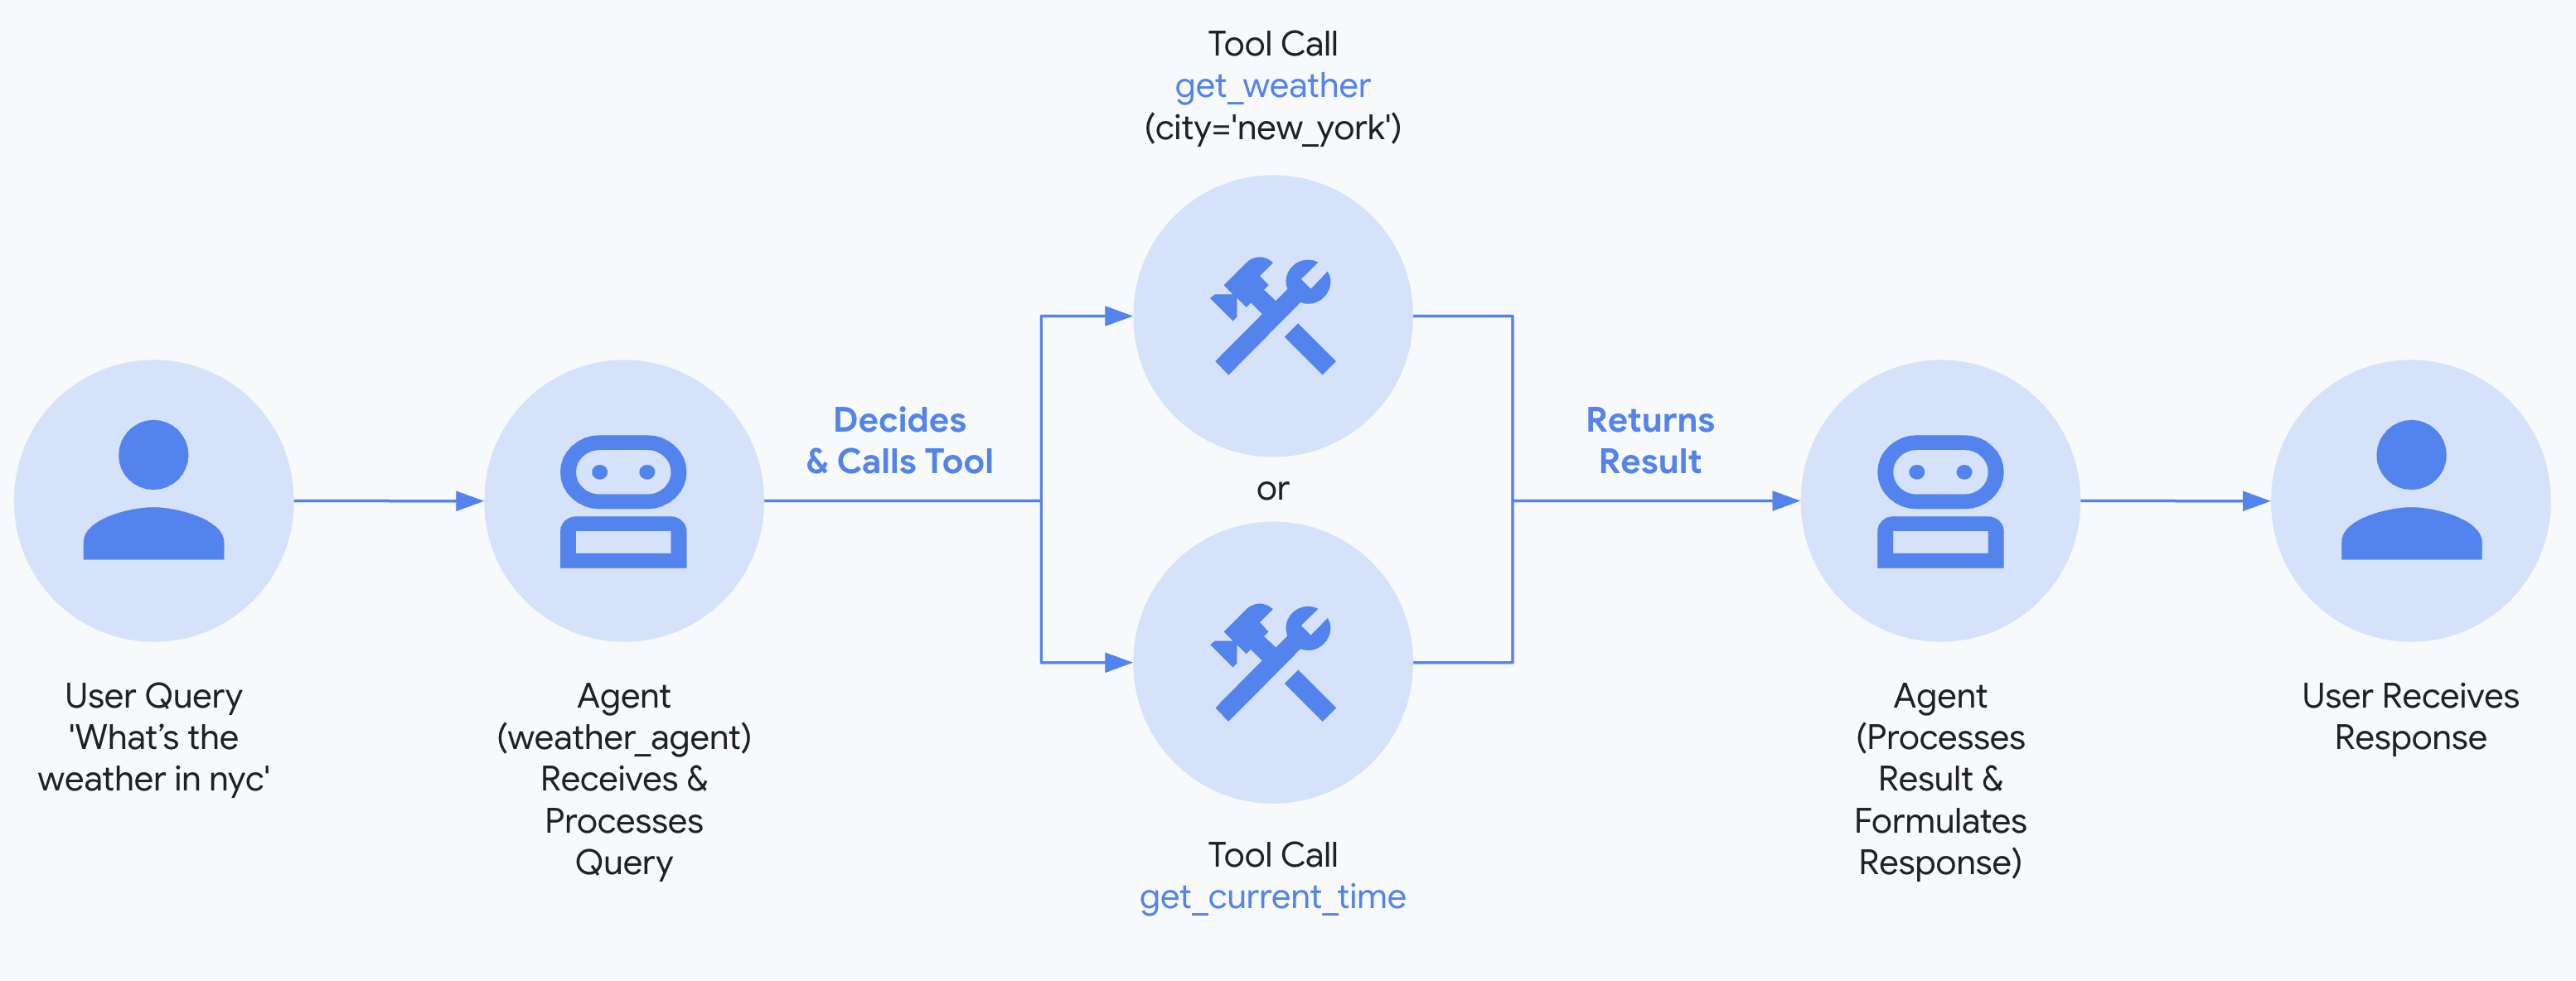

_____

## 🎓 Conclusión y Próximos Pasos

### 🎉 ¡Felicitaciones!

Has completado esta introducción completa al Google Agent Development Kit. Has aprendido:

✅ Qué es el ADK y sus ventajas clave

✅ Cómo instalar y configurar el entorno

✅ Los componentes principales de la arquitectura

✅ Cómo crear tu primer agente

✅ ADK run y ADK web

✅ Mejores prácticas para el desarrollo
